# American Dreaming:

### Using Machine Learning to Predict Home Pricing During Economic Uncertainty

*by Ashanti Jabri*

---

### Problem Statement

Across the country, housing prices are rising like never before - and faster than ever.

The *S&P CoreLogic Case-Shiller National Home Price NSA Index*, which tracks price changes of single-family homes, indicates that in November 2020, housing prices had risen 9.5 percent from the previous November. At the end of 2019, the average home was worth around \\$245,000. It’s now worth more than \$266,000, according to Zillow estimates.

This raises some serious questions about what our economy is doing, and why. The unemployment rate jumped in April 2020 to a level not seen since the 1930s — and still stood at 6.3 percent in January 2021. So where are people getting the money to buy homes? Why do they feel comfortable doing so? And what makes home sellers so confident that their homes will sell at increased rates during a global pandemic?

The saying goes that the market always corrects itself, but at what cost? We know that some of the factors behind the spike in home prices are due largely in part to all-time low-interest rates, and a ripe secondary market taking advantage of incredibly cheap mortgage-backed securities. This has created a sweet spot of sorts between supply and demand for homes, that has all the makings for a bursting bubble culminating with a massive refinance boom. 

The question for realtors, home buyers, sellers, and appraisers, then becomes "What are the proper metrics and criteria for pricing a home?" At this current time, following market trends make sense; do what your neighbors are doing, what your competitors are doing, and rake in the profits. But that is not a sustainable long-term strategy. Either housing prices continue to rise, as will inflation, or the market will correct itself, and we'll have to adapt to a new norm.

I hypothesize that currently, economic uncertainty has little effect on the overall housing market's profitability, and by being able to accurately predict house price in the form of a percentage relative to the mean of the national annual house price report of comparables, we will be able to account for future home price trends, given interest rate estimates. I will be using the Ames, Iowa housing dataset to make my predictions. This is a data set of single family homes sold between the years 2006-2010. This is extremely important for the success of our project, as being able to compare home pricing trends during the 2008 financial crisis will give us an even stronger basis for our hypothesis. We will be building a linear regression model for our predictions and analysis.


----

# Importing libraries and data

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

In [2]:
ames = pd.read_csv('./datasets/train.csv')

# Taking a first look and understanding our Data

In [3]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
ames.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


----
### Data Cleaning Process

I have a lot of rows with missing values, and a lot of features to go through. I can't begin to narrow down our features until we clean things up considerably. I'll begin with the most aggregious offenders and work our way through.

----

In [5]:
#Saving the Kaggle ID for future submission purposes
ames_id_for_kaggle = ames['Id']

In [6]:
#Dropping these uneccesary columns
ames.drop(columns =['Id', 'PID'], inplace = True)
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


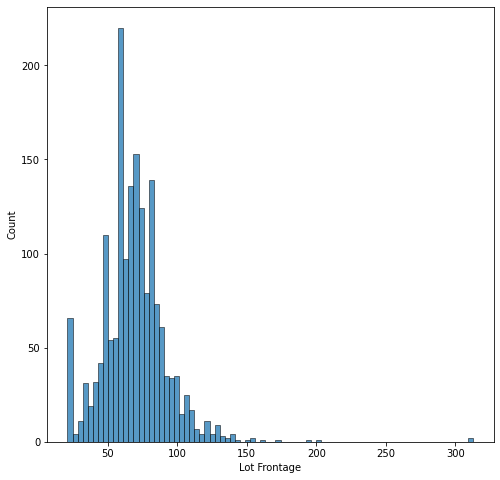

In [7]:
#Lot Frontage, Pool QC, Fence, Misc Features have the most missing values, so I'll take a look at those columns first
plt.figure(figsize=(8,8))

sns.histplot(ames['Lot Frontage']);

In [8]:
# The distribution is very off. All homes have Lot Frontage, so having so many missing values doesn't make sense. Let's replace the values with the mean and see the distribution.
ames.loc[ames['Lot Frontage'].isnull(), 'Lot Frontage'] = ames['Lot Frontage'].mean()

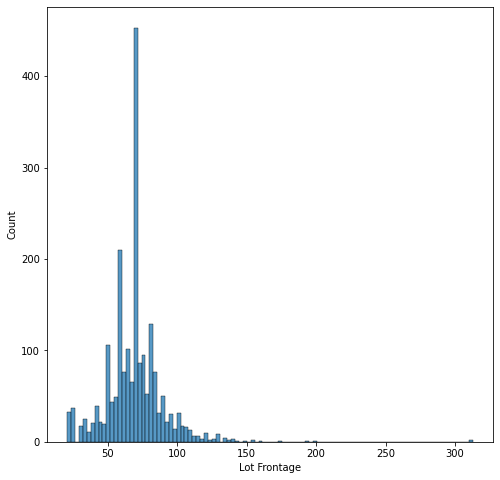

In [9]:
plt.figure(figsize=(8,8))
sns.histplot(ames['Lot Frontage']);

In [10]:
#Creating a Function to handle the remaining Null Values
# Originally was doing it the long way, but found a lot of help creating a function for this on https://www.kaggle.com/gunbl4d3/exploring-house-data-clean-dataset-for-modelling
def fix_null(df,train_df):
   
    #Categorical variables
    categorical = ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Garage Type','Garage Finish',
                   'Garage Cond','BsmtFin Type 2','Bsmt Exposure','BsmtFin Type 1','Bsmt Cond','Bsmt Qual',
                   'Mas Vnr Type']
    for col in categorical:
        df[col] = df[col].fillna('None')

    #Numerical variables
    numerical = ['Garage Yr Blt','Garage Qual','Mas Vnr Area','Bsmt Half Bath','Bsmt Full Bath','Garage Area',
                 'Garage Cars','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']
    for col in numerical:
        df[col] = df[col].fillna(0)
        
    #Few NULL values
    few = ['Electrical','MS Zoning','Utilities','Sale Type','Kitchen Qual','Exterior 2nd','Exterior 1st']
    for col in few:
        df[col] = df[col].fillna(train_df[col].mode()[0])
    
    #Functional
    df['Functional'] = df['Functional'].fillna('Typ')

        
    return df

In [11]:
ames = fix_null(ames,ames)

In [12]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            2051 non-null   object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [13]:
#Now we'll use the provided data dictionary to group columns together making it easier to dertimine relationships and narrow down features, and add 1's and 0's

ames['has_garage'] = [1 if x > 0 else 0 for x in ames['Garage Area']]
ames['has_pool'] = [1 if x > 0 else 0 for x in ames['Pool Area']]
ames['has_fireplace'] = [1 if x > 0 else 0 for x in ames['Fireplaces']]
ames['has_open_porch'] = [1 if x > 0 else 0 for x in ames['Open Porch SF']]
ames['has_bsmt'] = [1 if x > 0 else 0 for x in ames['Total Bsmt SF']]
ames['bsmt_bath'] = ames['Bsmt Full Bath'] + ames['Bsmt Half Bath']
ames['bathrooms'] = ames['Full Bath'] + ames['Half Bath']

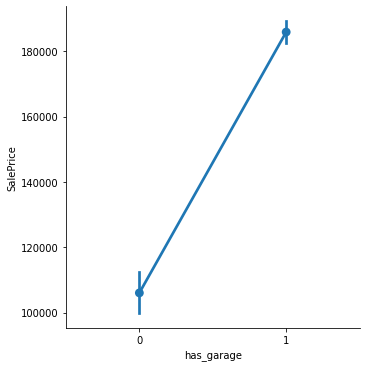

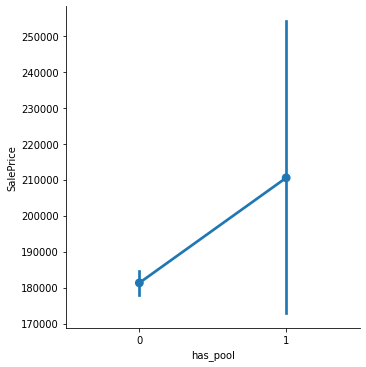

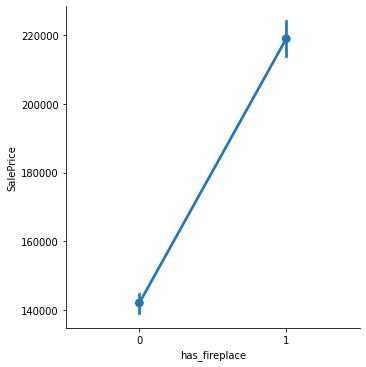

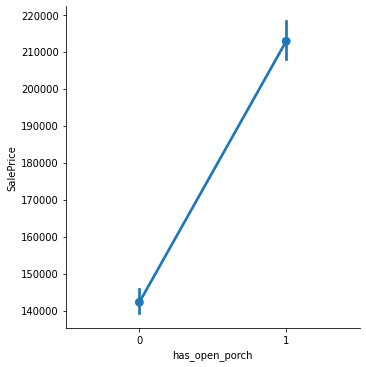

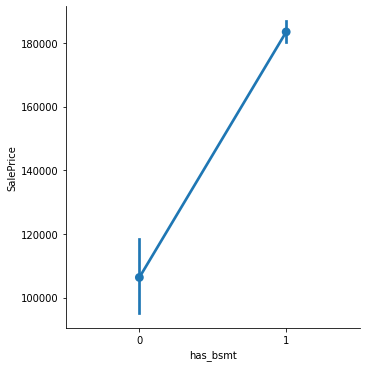

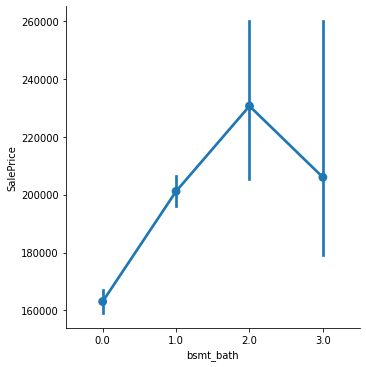

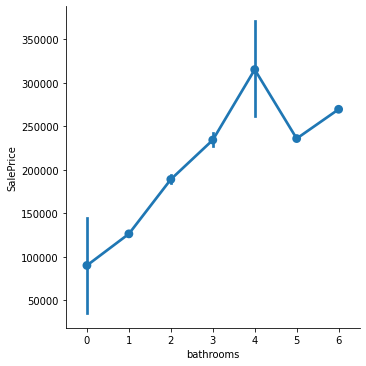

In [14]:
# I'll go ahead and take a look at these features relationship to Sales price
sns.catplot(data=ames, x ='has_garage', y='SalePrice', kind='point')
sns.catplot(data=ames, x ='has_pool', y='SalePrice', kind='point')
sns.catplot(data=ames, x ='has_fireplace', y='SalePrice', kind='point')
sns.catplot(data=ames, x ='has_open_porch', y='SalePrice', kind='point')
sns.catplot(data=ames, x ='has_bsmt', y='SalePrice', kind='point')
sns.catplot(data=ames, x ='bsmt_bath', y='SalePrice', kind='point')
sns.catplot(data=ames, x ='bathrooms', y='SalePrice', kind='point')

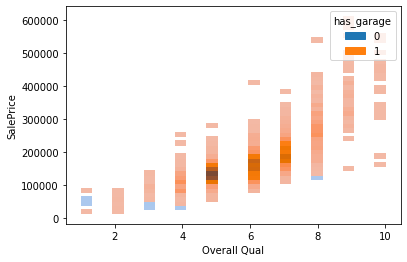

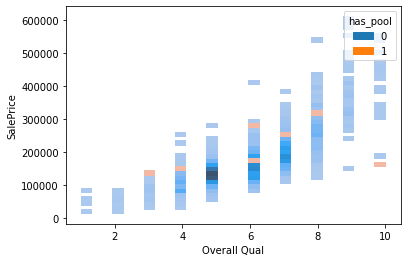

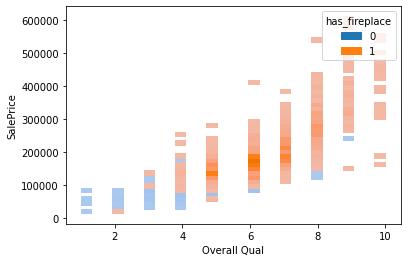

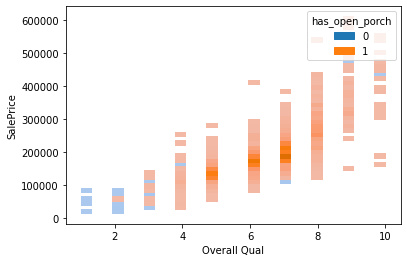

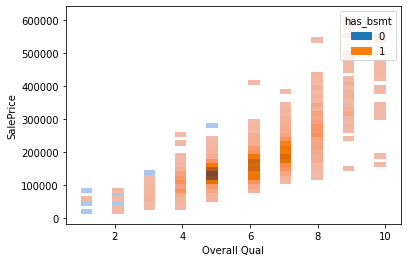

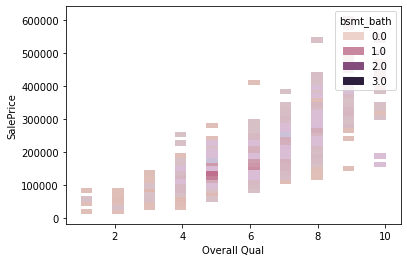

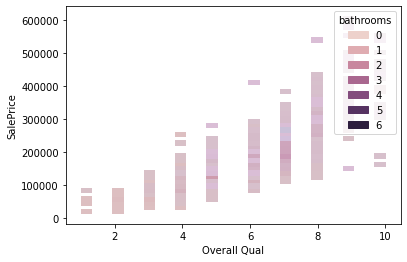

In [15]:
plt.figure()
sns.histplot(data=ames, x ='Overall Qual', y='SalePrice', hue = 'has_garage');
plt.figure()
sns.histplot(data=ames, x ='Overall Qual', y='SalePrice', hue = 'has_pool');
plt.figure()
sns.histplot(data=ames, x ='Overall Qual', y='SalePrice', hue = 'has_fireplace');
plt.figure()
sns.histplot(data=ames, x ='Overall Qual', y='SalePrice', hue = 'has_open_porch');
plt.figure()
sns.histplot(data=ames, x ='Overall Qual', y='SalePrice', hue = 'has_bsmt');
plt.figure()
sns.histplot(data=ames, x ='Overall Qual', y='SalePrice', hue = 'bsmt_bath');
plt.figure()
sns.histplot(data=ames, x ='Overall Qual', y='SalePrice', hue = 'bathrooms');

In [16]:
# The Data Dictionary indicates that the are a number of Variables in ordinal order, but they are not in numeric form, so we can't run them through a model. We have to convert them first to make them usable.
# Exter Qual, Bsmt Qual, Bsmt Exposure, Bsmtfin Type 1, Heating QC, Kitchin Qual, Garage Finish, Lot Shape (Writing here to avoid going back and forth between tabs)

conv_nums =  {'NA':1, 'Po':2, 'Fa':4, 'TA':6, 'Gd':8, 'Ex':10,'Gd':4,'Av':3,'Mn':2,'No':1,'GLQ':7,
              'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'Fin':3,'RFn':2,'Unf':1, 'Reg': 4, 'IR1':3,
              'IR2':2, 'IR3':1, 'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO': 1, 'Gtl':3, 'Mod':2, 'Sev':1
             }

In [17]:
ames['Land Slope'] = ames['Land Slope'].map(conv_nums)
ames['Lot Shape'] = ames['Lot Shape'].map(conv_nums)
ames['Utilities'] = ames['Utilities'].map(conv_nums)
ames['Exter Qual'] = ames['Exter Qual'].map(conv_nums)
ames['Bsmt Qual'] = ames['Bsmt Qual'].map(conv_nums)
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].map(conv_nums)
ames['BsmtFin Type 1'] = ames['BsmtFin Type 1'].map(conv_nums)
ames['Heating QC'] = ames['Heating QC'].map(conv_nums)
ames['Kitchen Qual'] = ames['Kitchen Qual'].map(conv_nums)
ames['Garage Finish'] = ames['Garage Finish'].map(conv_nums)

In [18]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            2051 non-null   object 
 6   Lot Shape        2051 non-null   int64  
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   int64  
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   int64  
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [19]:
ames.fillna(0, inplace = True)

In [20]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
0,60,RL,69.0552,13517,Pave,None,3,Lvl,4,CulDSac,...,2010,WD,130500,1,0,0,1,1,0.0,3
1,60,RL,43.0000,11492,Pave,None,3,Lvl,4,CulDSac,...,2009,WD,220000,1,0,1,1,1,1.0,3
2,20,RL,68.0000,7922,Pave,None,4,Lvl,4,Inside,...,2010,WD,109000,1,0,0,1,1,1.0,1
3,60,RL,73.0000,9802,Pave,None,4,Lvl,4,Inside,...,2010,WD,174000,1,0,0,0,1,0.0,3
4,50,RL,82.0000,14235,Pave,None,3,Lvl,4,Inside,...,2010,WD,138500,1,0,0,1,1,0.0,2


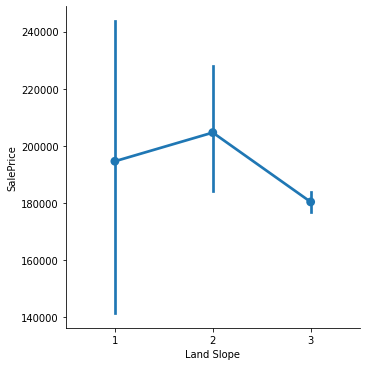

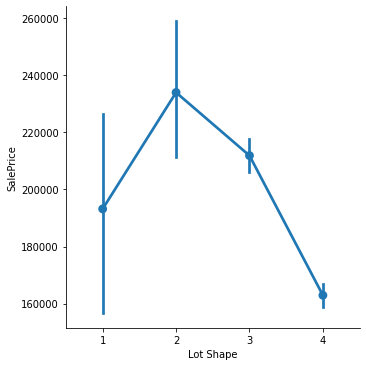

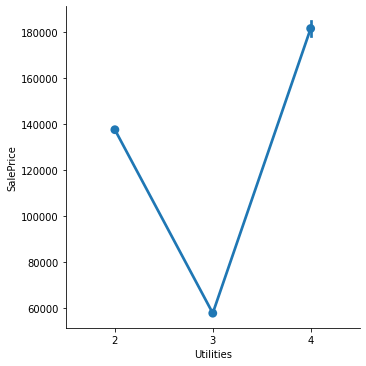

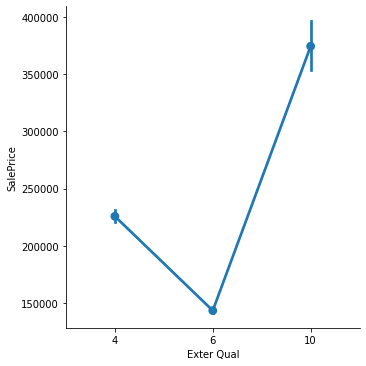

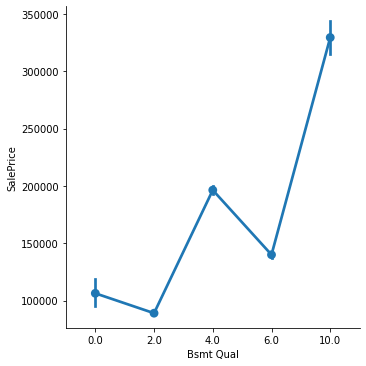

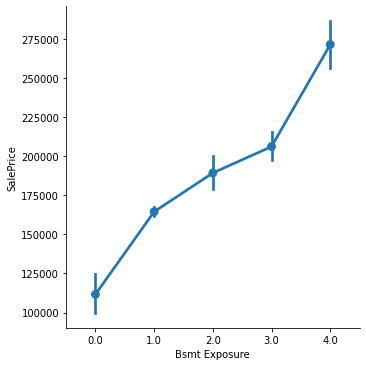

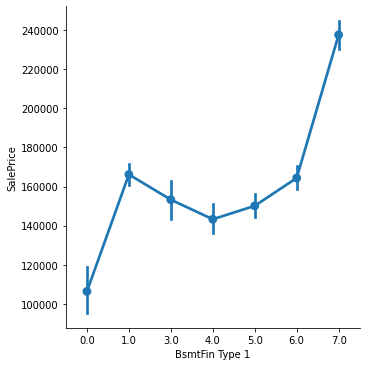

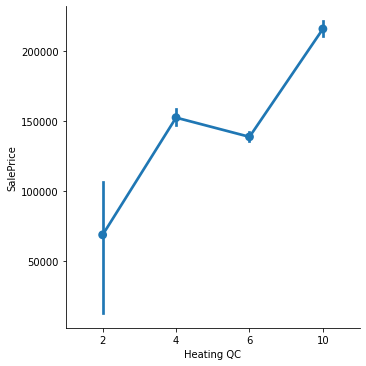

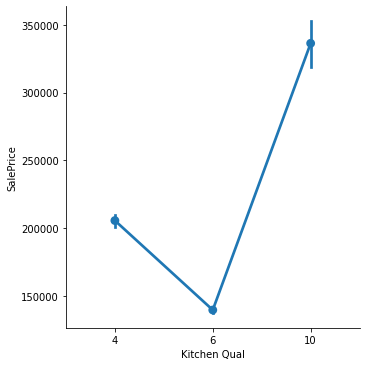

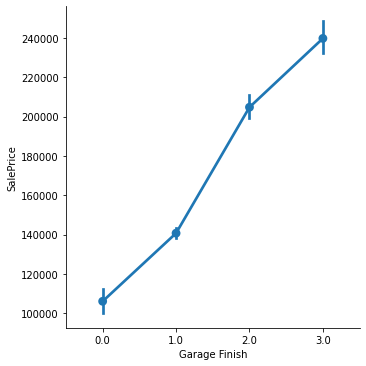

In [21]:
sns.catplot(data=ames, x ='Land Slope', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Lot Shape', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Utilities', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Exter Qual', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Bsmt Qual', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Bsmt Exposure', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='BsmtFin Type 1', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Heating QC', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Kitchen Qual', y='SalePrice', kind='point');
sns.catplot(data=ames, x ='Garage Finish', y='SalePrice', kind='point');

In [22]:
# Saving a copy of our clean Dataset

ames.to_csv('./datasets/ames_clean.csv', index =False)

In [23]:
ames_clean = pd.read_csv('./datasets/ames_clean.csv')

In [24]:
ames_clean.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
0,60,RL,69.0552,13517,Pave,None,3,Lvl,4,CulDSac,...,2010,WD,130500,1,0,0,1,1,0.0,3
1,60,RL,43.0000,11492,Pave,None,3,Lvl,4,CulDSac,...,2009,WD,220000,1,0,1,1,1,1.0,3
2,20,RL,68.0000,7922,Pave,None,4,Lvl,4,Inside,...,2010,WD,109000,1,0,0,1,1,1.0,1
3,60,RL,73.0000,9802,Pave,None,4,Lvl,4,Inside,...,2010,WD,174000,1,0,0,0,1,0.0,3
4,50,RL,82.0000,14235,Pave,None,3,Lvl,4,Inside,...,2010,WD,138500,1,0,0,1,1,0.0,2


---
# EDA (Exploratory Data Analysis)

---

In [25]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0000,70.0,190.0
Lot Frontage,2051.0,69.055200,21.306357,21.0,60.0,69.0552,78.0,313.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0000,11513.5,159000.0
Lot Shape,2051.0,3.595807,0.566514,1.0,3.0,4.0000,4.0,4.0
Utilities,2051.0,3.998537,0.049365,2.0,4.0,4.0000,4.0,4.0
Land Slope,2051.0,2.947343,0.244264,1.0,3.0,3.0000,3.0,3.0
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0000,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0000,6.0,9.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0000,2001.0,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0000,2004.0,2010.0


In [26]:
ames_clean['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

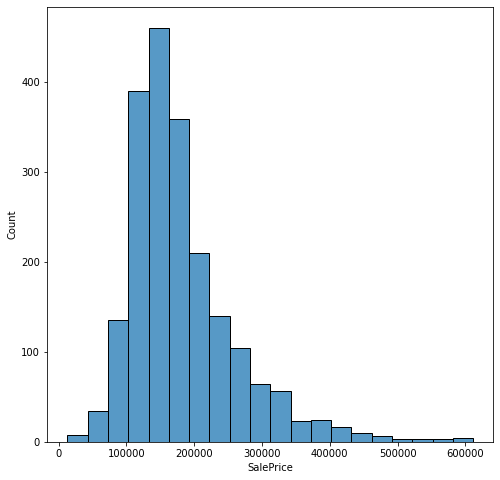

In [27]:
plt.figure(figsize=(8,8))

sns.histplot(ames['SalePrice'], bins = 20);

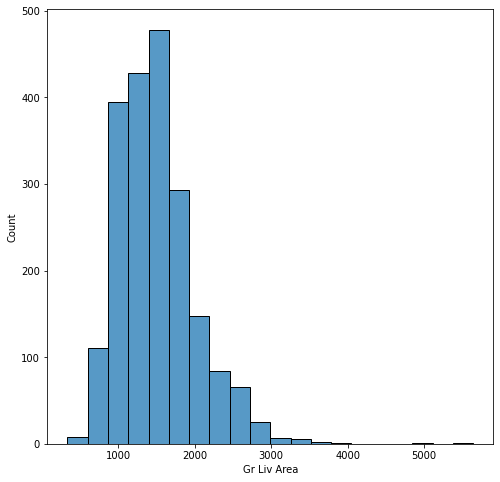

In [28]:
plt.figure(figsize=(8,8))

sns.histplot(ames_clean['Gr Liv Area'], bins = 20);

Right off the bat, a feature I felt would have the closest relationship to our target (Sale Price) seems to have an almost identical distribution. Let's do some more visualizations to see what else we can determine.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

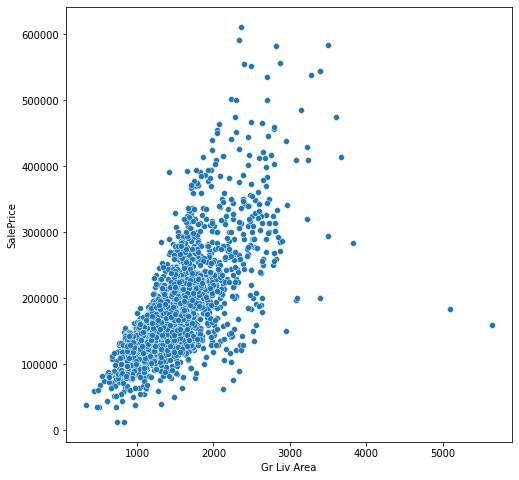

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = ames_clean, x='Gr Liv Area', y='SalePrice', x_bins = 20, y_bins = 20);

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

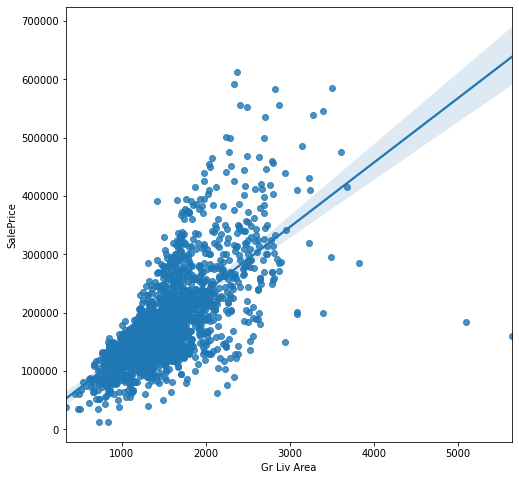

In [30]:
plt.figure(figsize=(8,8))
sns.regplot(data = ames_clean, x='Gr Liv Area', y='SalePrice')

We can obviously see two major outliers here, lets take care of those now.

In [31]:
ames_clean[ames_clean['Gr Liv Area']>=4000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
960,60,RL,313.0,63887,Pave,None,1,Bnk,4,Corner,...,2008,New,160000,1,1,1,1,1,2.0,3
1885,20,RL,128.0,39290,Pave,None,3,Bnk,4,Inside,...,2007,New,183850,1,0,1,1,1,2.0,3


In [32]:
ames_clean.drop(index=[960,1885], axis=0, inplace=True) 

In [33]:
ames_clean[ames_clean['Gr Liv Area']>=4000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms


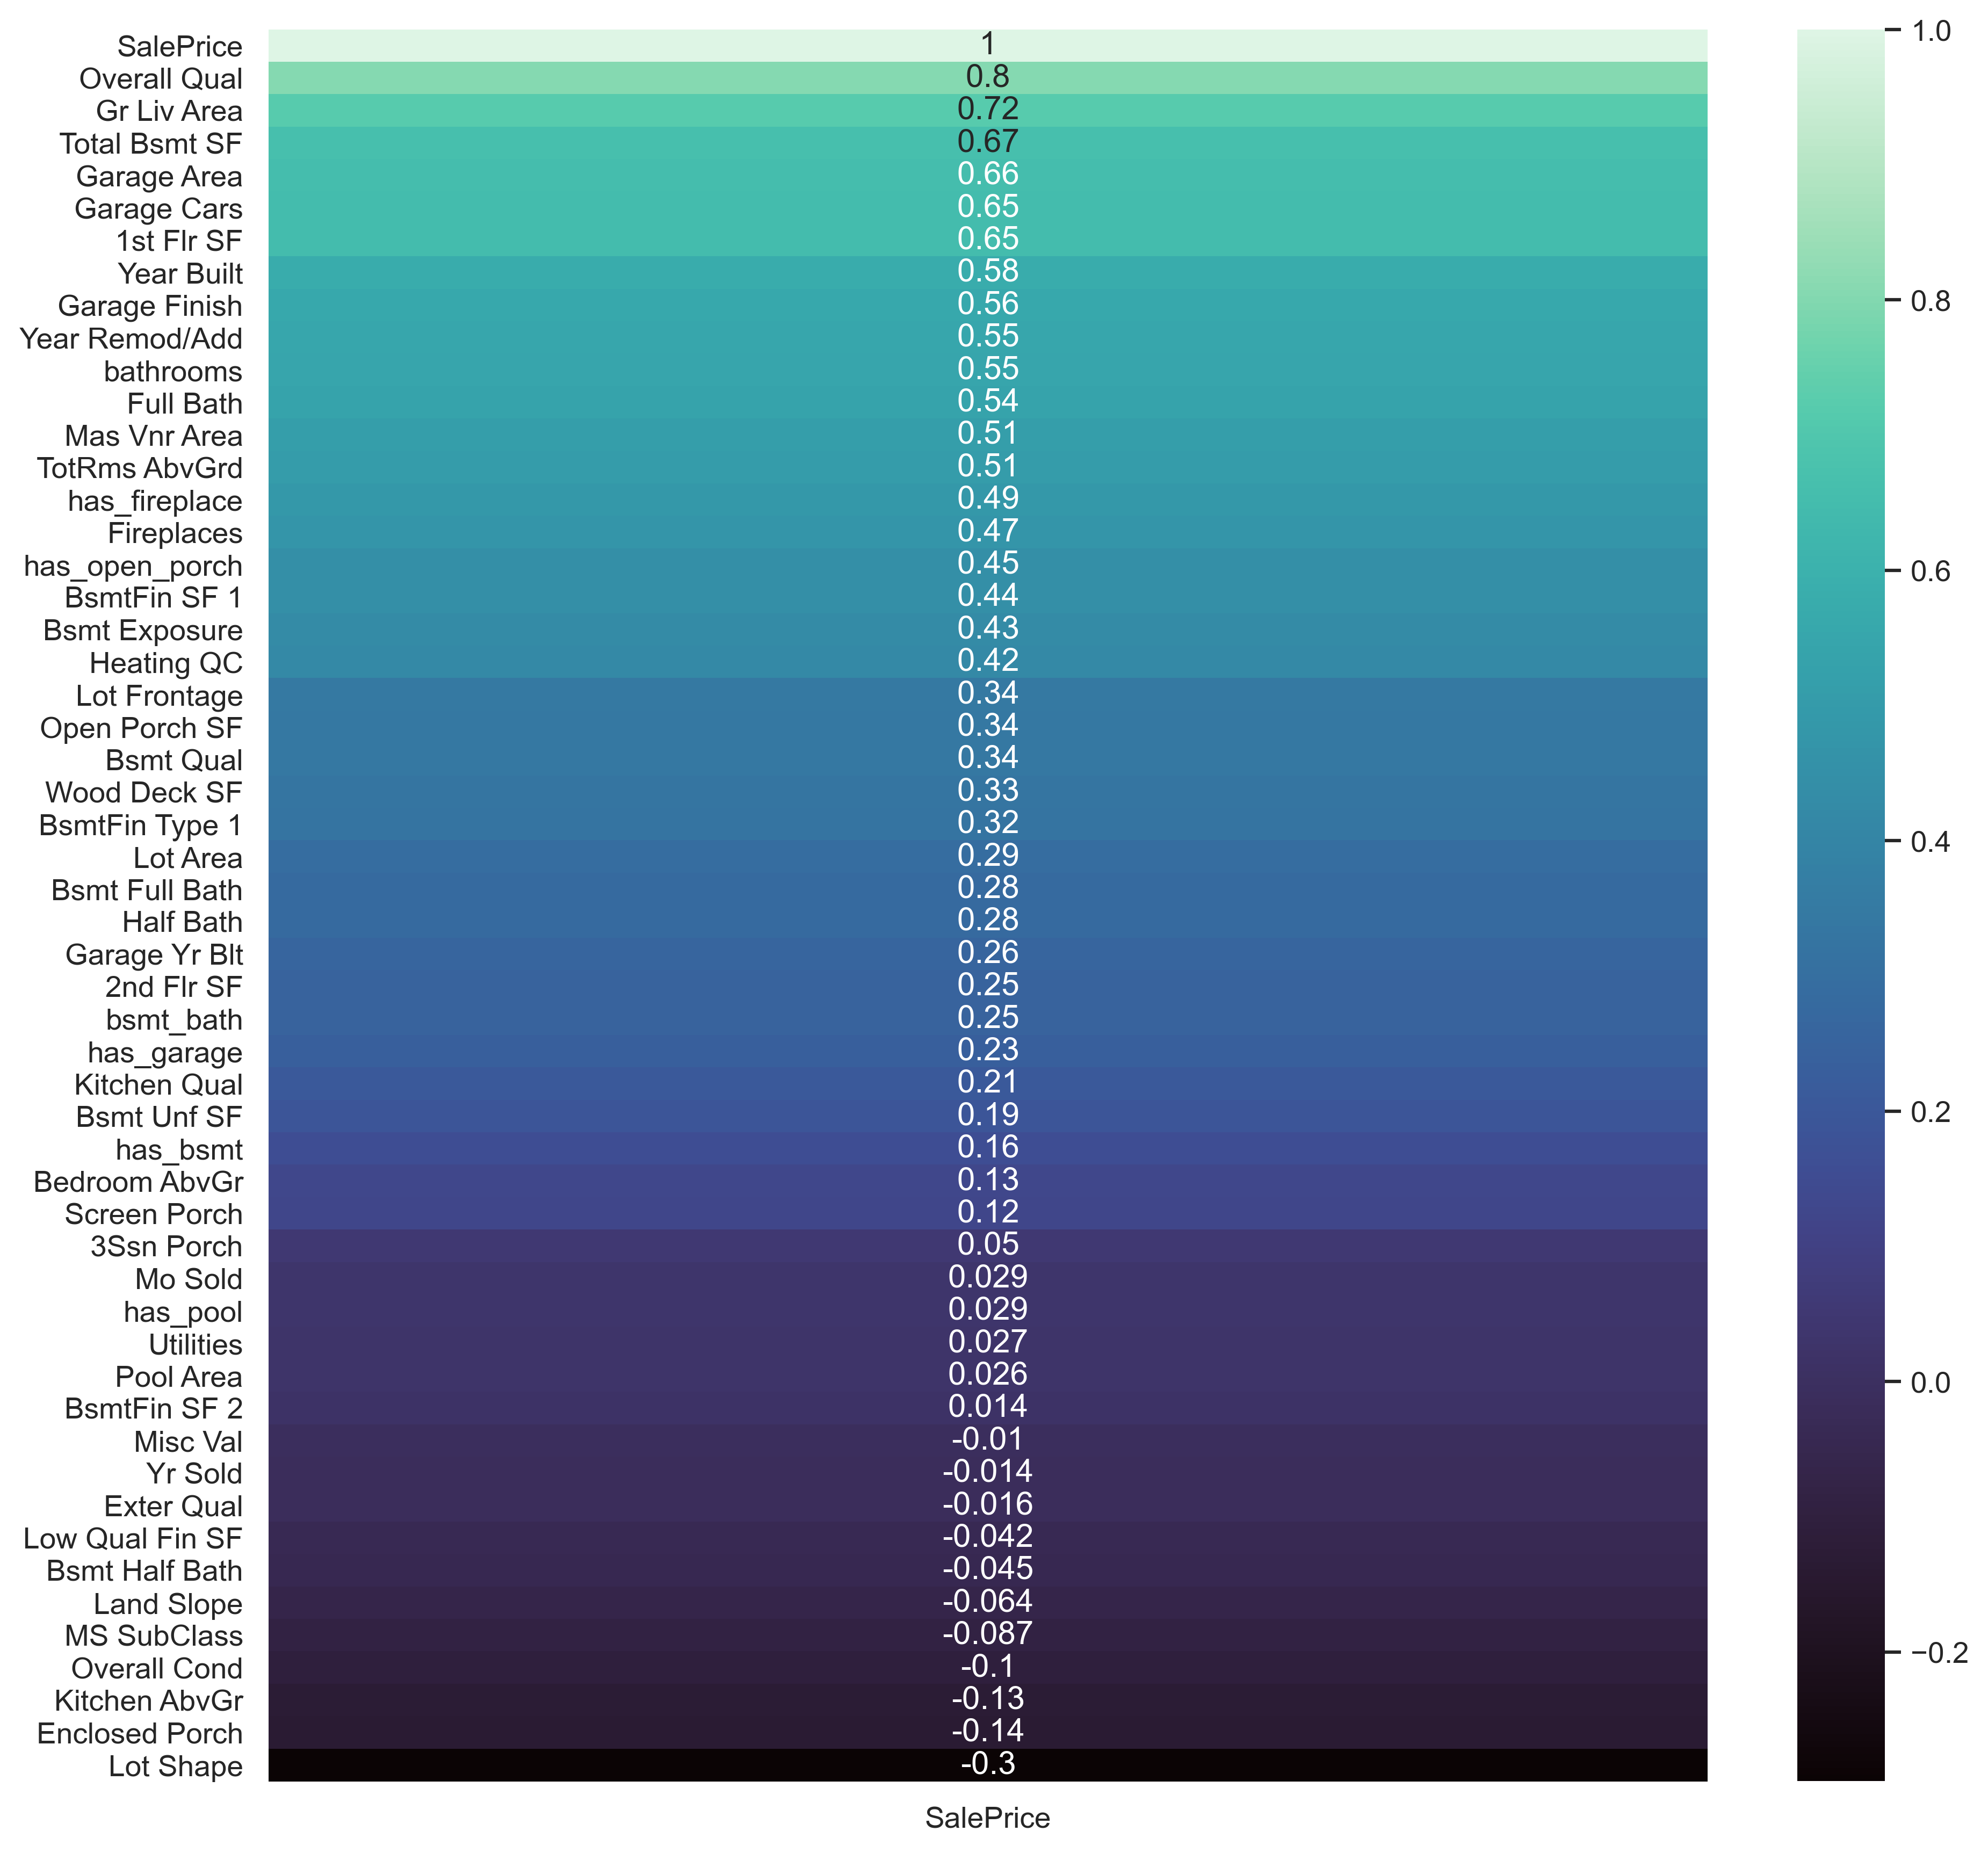

In [468]:
corr = ames_clean.corr()
plt.figure(figsize=(12,12))

sns.heatmap(corr[['SalePrice']].sort_values('SalePrice',ascending = False),
           annot=True, cmap = 'mako');

plt.savefig('./features heatmap.png', transparent = True, dpi = 400)

<Figure size 1440x1080 with 0 Axes>

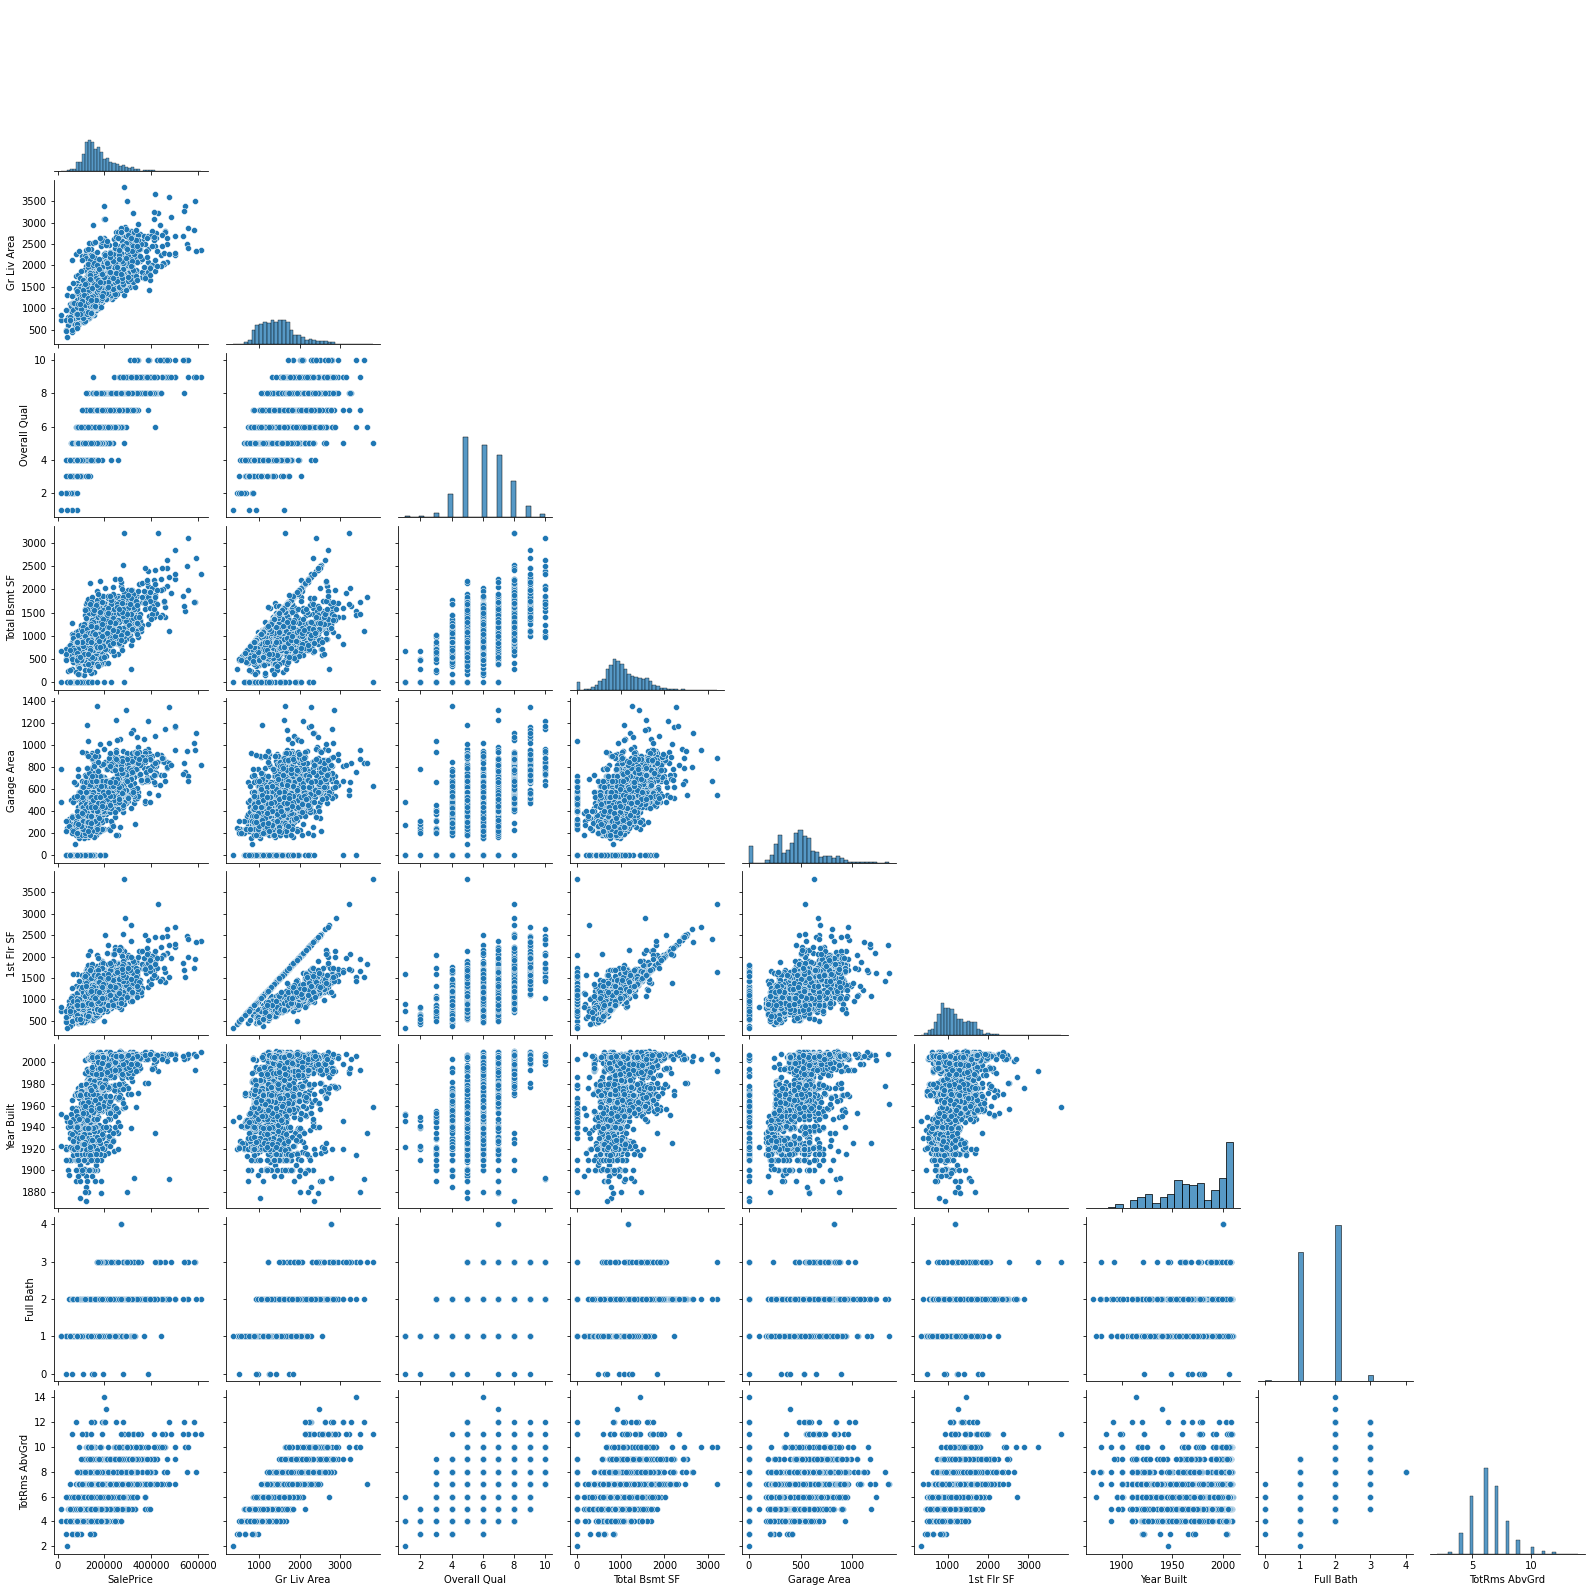

In [35]:
plt.figure(figsize=(20,15))

sns.pairplot(ames_clean, vars=['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Garage Area',
                              '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd'], corner = True);

Found some more outliers, we'll try to clean them up now

In [36]:
pd.set_option('display.max_columns', None)
ames_clean[ames_clean['Full Bath']>=4]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
1566,90,RL,69.0552,11855,Pave,None,4,Lvl,4,Inside,3,SawyerW,Norm,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,6,TA,PConc,10.0,TA,1.0,7.0,820.0,Unf,0.0,348.0,1168.0,GasA,10,Y,SBrkr,1168,1619,0,2787,2.0,0.0,4,2,6,2,6,8,Typ,2,TA,BuiltIn,2000.0,3.0,4.0,820.0,TA,TA,Y,312,0,0,0,0,0,None,None,None,0,10,2009,WD,269500,1,0,1,0,1,2.0,6
1605,90,RL,69.0552,7939,Pave,None,4,Lvl,4,Inside,3,SawyerW,Feedr,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,6,TA,PConc,10.0,TA,1.0,7.0,820.0,Unf,0.0,348.0,1168.0,GasA,10,Y,SBrkr,1168,1619,0,2787,2.0,0.0,4,2,6,2,6,8,Typ,2,TA,BuiltIn,2000.0,3.0,4.0,820.0,TA,TA,Y,312,0,0,0,0,0,None,None,None,0,10,2009,WD,269500,1,0,1,0,1,2.0,6


In [37]:
ames_clean.drop(index=[1566,1605], axis=0, inplace=True) 

In [38]:
pd.set_option('display.max_columns', None)
ames_clean[ames_clean['Total Bsmt SF']>=3000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
328,20,RL,69.0552,12692,Pave,None,3,Lvl,4,Inside,3,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,4,TA,PConc,4.0,TA,1.0,7.0,1231.0,Unf,0.0,1969.0,3200.0,GasA,10,Y,SBrkr,3228,0,0,3228,1.0,0.0,3,0,4,1,4,10,Typ,1,Gd,Attchd,1992.0,2.0,2.0,546.0,TA,TA,Y,264,75,291,0,0,0,None,None,None,0,5,2007,WD,430000,1,0,1,1,1,1.0,3
1147,20,RL,85.0000,10655,Pave,None,3,Lvl,4,Inside,3,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,4,TA,PConc,4.0,TA,1.0,7.0,1124.0,None,479.0,1603.0,3206.0,GasA,10,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,4,7,Typ,1,Gd,Attchd,2003.0,2.0,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2009,WD,284000,1,0,1,0,1,1.0,2
1164,20,RL,105.0000,15431,Pave,None,4,Lvl,4,Inside,3,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,10,TA,PConc,10.0,TA,4.0,7.0,1767.0,ALQ,539.0,788.0,3094.0,GasA,10,Y,SBrkr,2402,0,0,2402,1.0,0.0,2,0,2,1,10,10,Typ,2,Gd,Attchd,2008.0,3.0,3.0,672.0,TA,TA,Y,0,72,0,0,170,0,None,None,None,0,4,2009,WD,555000,1,0,1,1,1,1.0,2


In [39]:
ames_clean.drop(index=[1147], axis=0, inplace=True) 

In [40]:
pd.set_option('display.max_columns', None)
ames_clean[ames_clean['Year Built']<=1880]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
12,70,RL,120.0,26400,Pave,None,4,Bnk,4,FR2,3,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,TA,PConc,0.0,None,0.0,0.0,0.0,None,0.0,0.0,0.0,GasA,10,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,6,7,Mod,1,TA,Attchd,1900.0,1.0,2.0,576.0,TA,TA,P,0,0,0,0,0,0,None,None,None,0,6,2009,WD,131000,1,0,1,0,0,0.0,1
136,50,RL,54.0,6342,Pave,None,4,Lvl,4,Inside,3,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,6,Gd,CBlock,6.0,TA,1.0,1.0,0.0,Unf,0.0,780.0,780.0,GasA,4,N,SBrkr,780,240,0,1020,0.0,0.0,1,0,2,1,6,6,Typ,0,None,None,0.0,0.0,0.0,0.0,0,None,N,0,0,176,0,0,0,None,None,None,0,5,2010,WD,94000,0,0,0,0,1,0.0,1
784,70,RM,90.0,9900,Pave,None,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,2Story,6,4,1880,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,6,TA,BrkTil,6.0,TA,2.0,1.0,0.0,Unf,0.0,1008.0,1008.0,GasW,6,Y,SBrkr,1178,1032,0,2210,0.0,0.0,2,0,5,1,4,8,Typ,0,None,Detchd,1930.0,1.0,1.0,205.0,Fa,TA,N,0,48,0,0,0,0,None,None,None,0,5,2007,WD,117500,1,0,0,1,1,0.0,2
951,70,RM,50.0,5250,Pave,Pave,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,6,Gd,BrkTil,6.0,Fa,1.0,3.0,259.0,Unf,0.0,425.0,684.0,OthW,4,N,SBrkr,938,1215,205,2358,0.0,0.0,2,0,4,1,6,8,Typ,0,None,None,0.0,0.0,0.0,0.0,0,None,Y,0,54,20,0,0,0,None,None,None,0,12,2008,WD,122000,0,0,0,1,1,0.0,2
1134,75,RM,75.0,13500,Pave,Grvl,4,Lvl,4,Corner,3,OldTown,Norm,Norm,1Fam,2.5Unf,7,8,1879,1987,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,6,Gd,PConc,6.0,TA,1.0,1.0,0.0,Unf,0.0,819.0,819.0,GasA,6,Y,FuseA,1312,1142,0,2454,0.0,0.0,2,0,3,1,6,8,Typ,1,Gd,Attchd,1950.0,1.0,2.0,576.0,TA,TA,N,0,148,150,0,0,0,None,MnPrv,None,0,2,2007,WD,185000,1,0,1,1,1,0.0,2
1939,75,RM,87.0,18386,Pave,None,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,6,TA,BrkTil,6.0,TA,1.0,1.0,0.0,Unf,0.0,1470.0,1470.0,GasA,10,Y,SBrkr,1675,1818,0,3493,0.0,0.0,3,0,3,1,4,10,Typ,1,Ex,Attchd,2003.0,1.0,3.0,870.0,TA,TA,Y,302,0,0,0,0,0,None,None,None,0,5,2008,WD,295000,1,0,1,0,1,0.0,3


In [41]:
ames_clean.drop(index=[1939], axis=0, inplace=True) 

In [42]:
pd.set_option('display.max_columns', None)
ames_clean[ames_clean['1st Flr SF']>=2800]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
328,20,RL,69.0552,12692,Pave,None,3,Lvl,4,Inside,3,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,4,TA,PConc,4.0,TA,1.0,7.0,1231.0,Unf,0.0,1969.0,3200.0,GasA,10,Y,SBrkr,3228,0,0,3228,1.0,0.0,3,0,4,1,4,10,Typ,1,Gd,Attchd,1992.0,2.0,2.0,546.0,TA,TA,Y,264,75,291,0,0,0,None,None,None,0,5,2007,WD,430000,1,0,1,1,1,1.0,3
616,20,RL,123.0000,47007,Pave,None,3,Lvl,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,6,TA,Slab,0.0,None,0.0,0.0,0.0,None,0.0,0.0,0.0,GasA,6,Y,SBrkr,3820,0,0,3820,0.0,0.0,3,1,5,1,10,11,Typ,2,Gd,Attchd,1959.0,1.0,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,284700,1,0,1,1,0,0.0,4
1243,20,RL,69.0552,15498,Pave,None,3,Lvl,4,Corner,3,Timber,Norm,Norm,1Fam,1Story,8,6,1976,1976,Hip,WdShake,Stone,HdBoard,None,0.0,4,TA,CBlock,4.0,TA,3.0,6.0,1165.0,LwQ,400.0,0.0,1565.0,GasA,6,Y,SBrkr,2898,0,0,2898,1.0,0.0,2,0,2,1,4,10,Typ,1,Gd,Attchd,1976.0,3.0,2.0,665.0,TA,TA,Y,0,72,174,0,0,0,None,None,None,0,5,2008,COD,287000,1,0,1,1,1,1.0,2


In [43]:
ames_clean.drop(index=[616,1243], axis=0, inplace=True) 

In [44]:
pd.set_option('display.max_columns', None)
ames_clean[ames_clean['Garage Area']>=1300]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
337,190,RL,69.0552,32463,Pave,None,4,Low,4,Inside,2,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,6,Gd,CBlock,6.0,TA,3.0,5.0,1159.0,Unf,0.0,90.0,1249.0,GasA,10,Y,SBrkr,1622,0,0,1622,1.0,0.0,1,0,3,1,6,7,Typ,1,TA,2Types,1975.0,3.0,4.0,1356.0,TA,TA,Y,439,0,0,0,0,0,None,None,None,0,3,2007,WD,168000,1,0,1,0,1,1.0,1
1158,20,RL,91.0000,11778,Pave,None,4,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,554.0,4,TA,PConc,4.0,TA,4.0,7.0,2085.0,Unf,0.0,186.0,2271.0,GasA,10,Y,SBrkr,2276,0,0,2276,1.0,0.0,2,0,3,1,10,7,Typ,2,Gd,Attchd,2008.0,2.0,3.0,1348.0,Gd,TA,Y,0,0,70,0,255,0,None,None,None,0,6,2008,WD,475000,1,0,1,0,1,1.0,2
1293,60,RL,69.0552,12511,Pave,None,3,Lvl,4,Corner,3,NWAmes,Norm,Norm,1Fam,2Story,7,7,1978,1978,Mansard,WdShake,Plywood,Plywood,BrkFace,168.0,4,TA,PConc,4.0,TA,1.0,6.0,988.0,Unf,0.0,432.0,1420.0,GasA,10,Y,SBrkr,1420,1420,0,2840,0.0,1.0,2,1,4,1,4,8,Min2,2,Gd,Attchd,1978.0,3.0,4.0,1314.0,TA,Gd,Y,0,16,0,0,208,0,None,MnPrv,None,0,12,2008,WD,292500,1,0,1,1,1,1.0,3


In [45]:
ames_clean.drop(index=[183,1628], axis=0, inplace=True) 

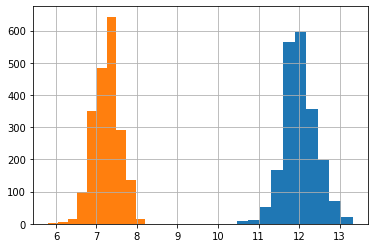

In [46]:
ames_clean['SalePrice'].apply(np.log).hist()
ames_clean['Gr Liv Area'].apply(np.log).hist()
plt.show()


After doing some research on getting more accurate visualizations, I came across [This](https://datascience.stackexchange.com/questions/22957/am-i-doing-a-log-transformation-of-data-correctly), which inspired me to check the log of my features, and I see that it would be beneficial to incorporate log versions of our target and certain variables for our model's accuracy.

In [47]:
# https://discuss.codecademy.com/t/when-should-i-use-reset-index-in-pandas/354480

ames.reset_index(drop=True)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
0,60,RL,69.0552,13517,Pave,None,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,TA,CBlock,6.0,TA,1.0,7.0,533.0,Unf,0.0,192.0,725.0,GasA,10,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,None,Attchd,1976.0,2.0,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,None,None,0,3,2010,WD,130500,1,0,0,1,1,0.0,3
1,60,RL,43.0000,11492,Pave,None,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,TA,PConc,4.0,TA,1.0,7.0,637.0,Unf,0.0,276.0,913.0,GasA,10,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,1997.0,2.0,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,None,None,0,4,2009,WD,220000,1,0,1,1,1,1.0,3
2,20,RL,68.0000,7922,Pave,None,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,6,Gd,CBlock,6.0,TA,1.0,7.0,731.0,Unf,0.0,326.0,1057.0,GasA,6,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,None,Detchd,1953.0,1.0,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,None,None,0,1,2010,WD,109000,1,0,0,1,1,1.0,1
3,60,RL,73.0000,9802,Pave,None,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,6,TA,PConc,4.0,TA,1.0,1.0,0.0,Unf,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,6,7,Typ,0,None,BuiltIn,2007.0,3.0,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,4,2010,WD,174000,1,0,0,0,1,0.0,3
4,50,RL,82.0000,14235,Pave,None,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,6,TA,PConc,4.0,Gd,1.0,1.0,0.0,Unf,0.0,676.0,676.0,GasA,6,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,6,6,Typ,0,None,Detchd,1957.0,1.0,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,None,None,0,3,2010,WD,138500,1,0,0,1,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,79.0000,11449,Pave,None,3,HLS,4,Inside,3,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,TA,PConc,4.0,TA,3.0,7.0,1011.0,Unf,0.0,873.0,1884.0,GasA,10,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,4,7,Typ,1,Gd,Attchd,2007.0,3.0,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,None,None,None,0,1,2008,WD,298751,1,0,1,1,1,1.0,2
2047,30,RL,69.0552,12342,Pave,None,3,Lvl,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,6,TA,CBlock,6.0,TA,1.0,5.0,262.0,Unf,0.0,599.0,861.0,GasA,10,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,6,4,Typ,0,None,Detchd,1961.0,1.0,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,None,None,None,0,3,2009,WD,82500,1,0,0,0,1,0.0,1
2048,50,RL,57.0000,7558,Pave,None,4,Bnk,4,Inside,3,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,6,TA,BrkTil,6.0,TA,1.0,1.0,0.0,Unf,0.0,896.0,896.0,GasA,4,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,

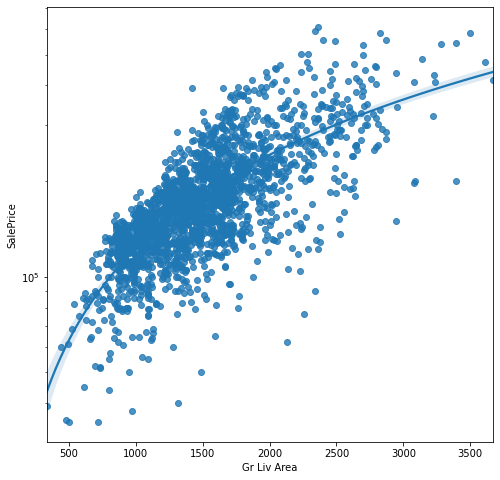

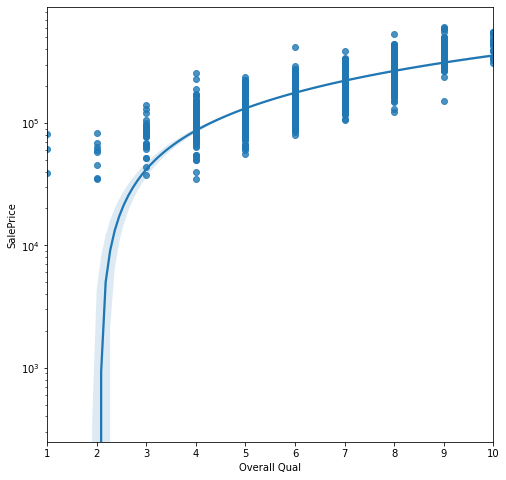

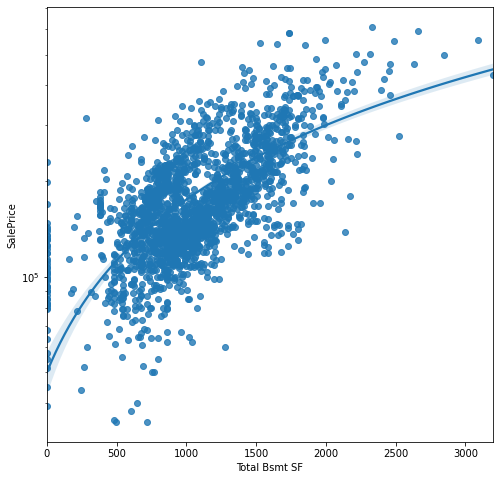

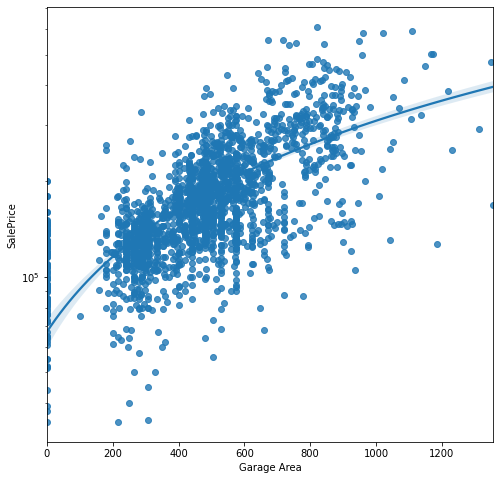

In [48]:
plt.figure(figsize=(8,8))
ax = sns.regplot(data = ames_clean, x='Gr Liv Area', y='SalePrice')
ax.set_yscale('log')
plt.figure(figsize=(8,8))
ax = sns.regplot(data = ames_clean, x='Overall Qual', y='SalePrice')
ax.set_yscale('log')
plt.figure(figsize=(8,8))
ax = sns.regplot(data = ames_clean, x='Total Bsmt SF', y='SalePrice')
ax.set_yscale('log')
plt.figure(figsize=(8,8))
ax = sns.regplot(data = ames_clean, x='Garage Area', y='SalePrice')
ax.set_yscale('log')

<Figure size 576x576 with 0 Axes>

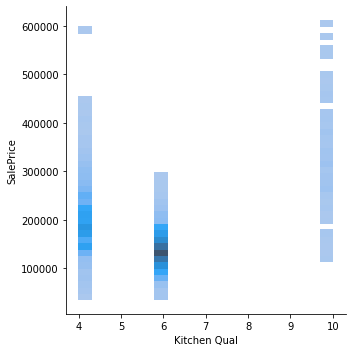

In [49]:
plt.figure(figsize=(8,8))
ax = sns.displot(data = ames_clean, x='Kitchen Qual', y='SalePrice')
plt.show();

In [50]:
ames_clean.drop(index=[1964], axis=0, inplace=True) 

In [51]:
pd.set_option('display.max_columns', None)
ames_clean[(ames_clean['Kitchen Qual']==4) & (ames_clean['SalePrice']>=500000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms


In [52]:
ames.reset_index(drop=True)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,has_garage,has_pool,has_fireplace,has_open_porch,has_bsmt,bsmt_bath,bathrooms
0,60,RL,69.0552,13517,Pave,None,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,TA,CBlock,6.0,TA,1.0,7.0,533.0,Unf,0.0,192.0,725.0,GasA,10,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,None,Attchd,1976.0,2.0,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,None,None,0,3,2010,WD,130500,1,0,0,1,1,0.0,3
1,60,RL,43.0000,11492,Pave,None,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,TA,PConc,4.0,TA,1.0,7.0,637.0,Unf,0.0,276.0,913.0,GasA,10,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,1997.0,2.0,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,None,None,0,4,2009,WD,220000,1,0,1,1,1,1.0,3
2,20,RL,68.0000,7922,Pave,None,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,6,Gd,CBlock,6.0,TA,1.0,7.0,731.0,Unf,0.0,326.0,1057.0,GasA,6,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,None,Detchd,1953.0,1.0,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,None,None,0,1,2010,WD,109000,1,0,0,1,1,1.0,1
3,60,RL,73.0000,9802,Pave,None,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,6,TA,PConc,4.0,TA,1.0,1.0,0.0,Unf,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,6,7,Typ,0,None,BuiltIn,2007.0,3.0,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,4,2010,WD,174000,1,0,0,0,1,0.0,3
4,50,RL,82.0000,14235,Pave,None,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,6,TA,PConc,4.0,Gd,1.0,1.0,0.0,Unf,0.0,676.0,676.0,GasA,6,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,6,6,Typ,0,None,Detchd,1957.0,1.0,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,None,None,0,3,2010,WD,138500,1,0,0,1,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,79.0000,11449,Pave,None,3,HLS,4,Inside,3,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,TA,PConc,4.0,TA,3.0,7.0,1011.0,Unf,0.0,873.0,1884.0,GasA,10,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,4,7,Typ,1,Gd,Attchd,2007.0,3.0,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,None,None,None,0,1,2008,WD,298751,1,0,1,1,1,1.0,2
2047,30,RL,69.0552,12342,Pave,None,3,Lvl,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,6,TA,CBlock,6.0,TA,1.0,5.0,262.0,Unf,0.0,599.0,861.0,GasA,10,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,6,4,Typ,0,None,Detchd,1961.0,1.0,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,None,None,None,0,3,2009,WD,82500,1,0,0,0,1,0.0,1
2048,50,RL,57.0000,7558,Pave,None,4,Bnk,4,Inside,3,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,6,TA,BrkTil,6.0,TA,1.0,1.0,0.0,Unf,0.0,896.0,896.0,GasA,4,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,

# Modeling

----



In [470]:
x_vars = ames_clean._get_numeric_data().columns.drop(['BsmtFin Type 1', 'Land Slope', 'Utilities', 'Half Bath', 'Garage Finish',
 'has_garage', 'has_pool', 'has_fireplace', 'has_open_porch',
 'bsmt_bath', 'bathrooms', 'SalePrice'])

X = ames_clean[x_vars]

y = np.log(ames_clean['SalePrice'])

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=808)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [472]:
lr.score(X_train, y_train)

0.9141483399823884

In [473]:
lr.score(X_test, y_test)

0.9086921250721309

In [474]:
cross_val_score(lr, X = X_train, y = y_train).mean()

0.9056381353202598

In [475]:
cross_val_score(lr, X = X_test, y = y_test).mean()

0.891143916943868

In [67]:
metrics.mean_squared_error(np.exp(y_train), np.exp(lr.predict(X_train)), squared = False)

21251.4834168086

In [68]:
metrics.mean_squared_error(np.exp(y_test), np.exp(lr.predict(X_test)), squared = False)

19702.909359036057

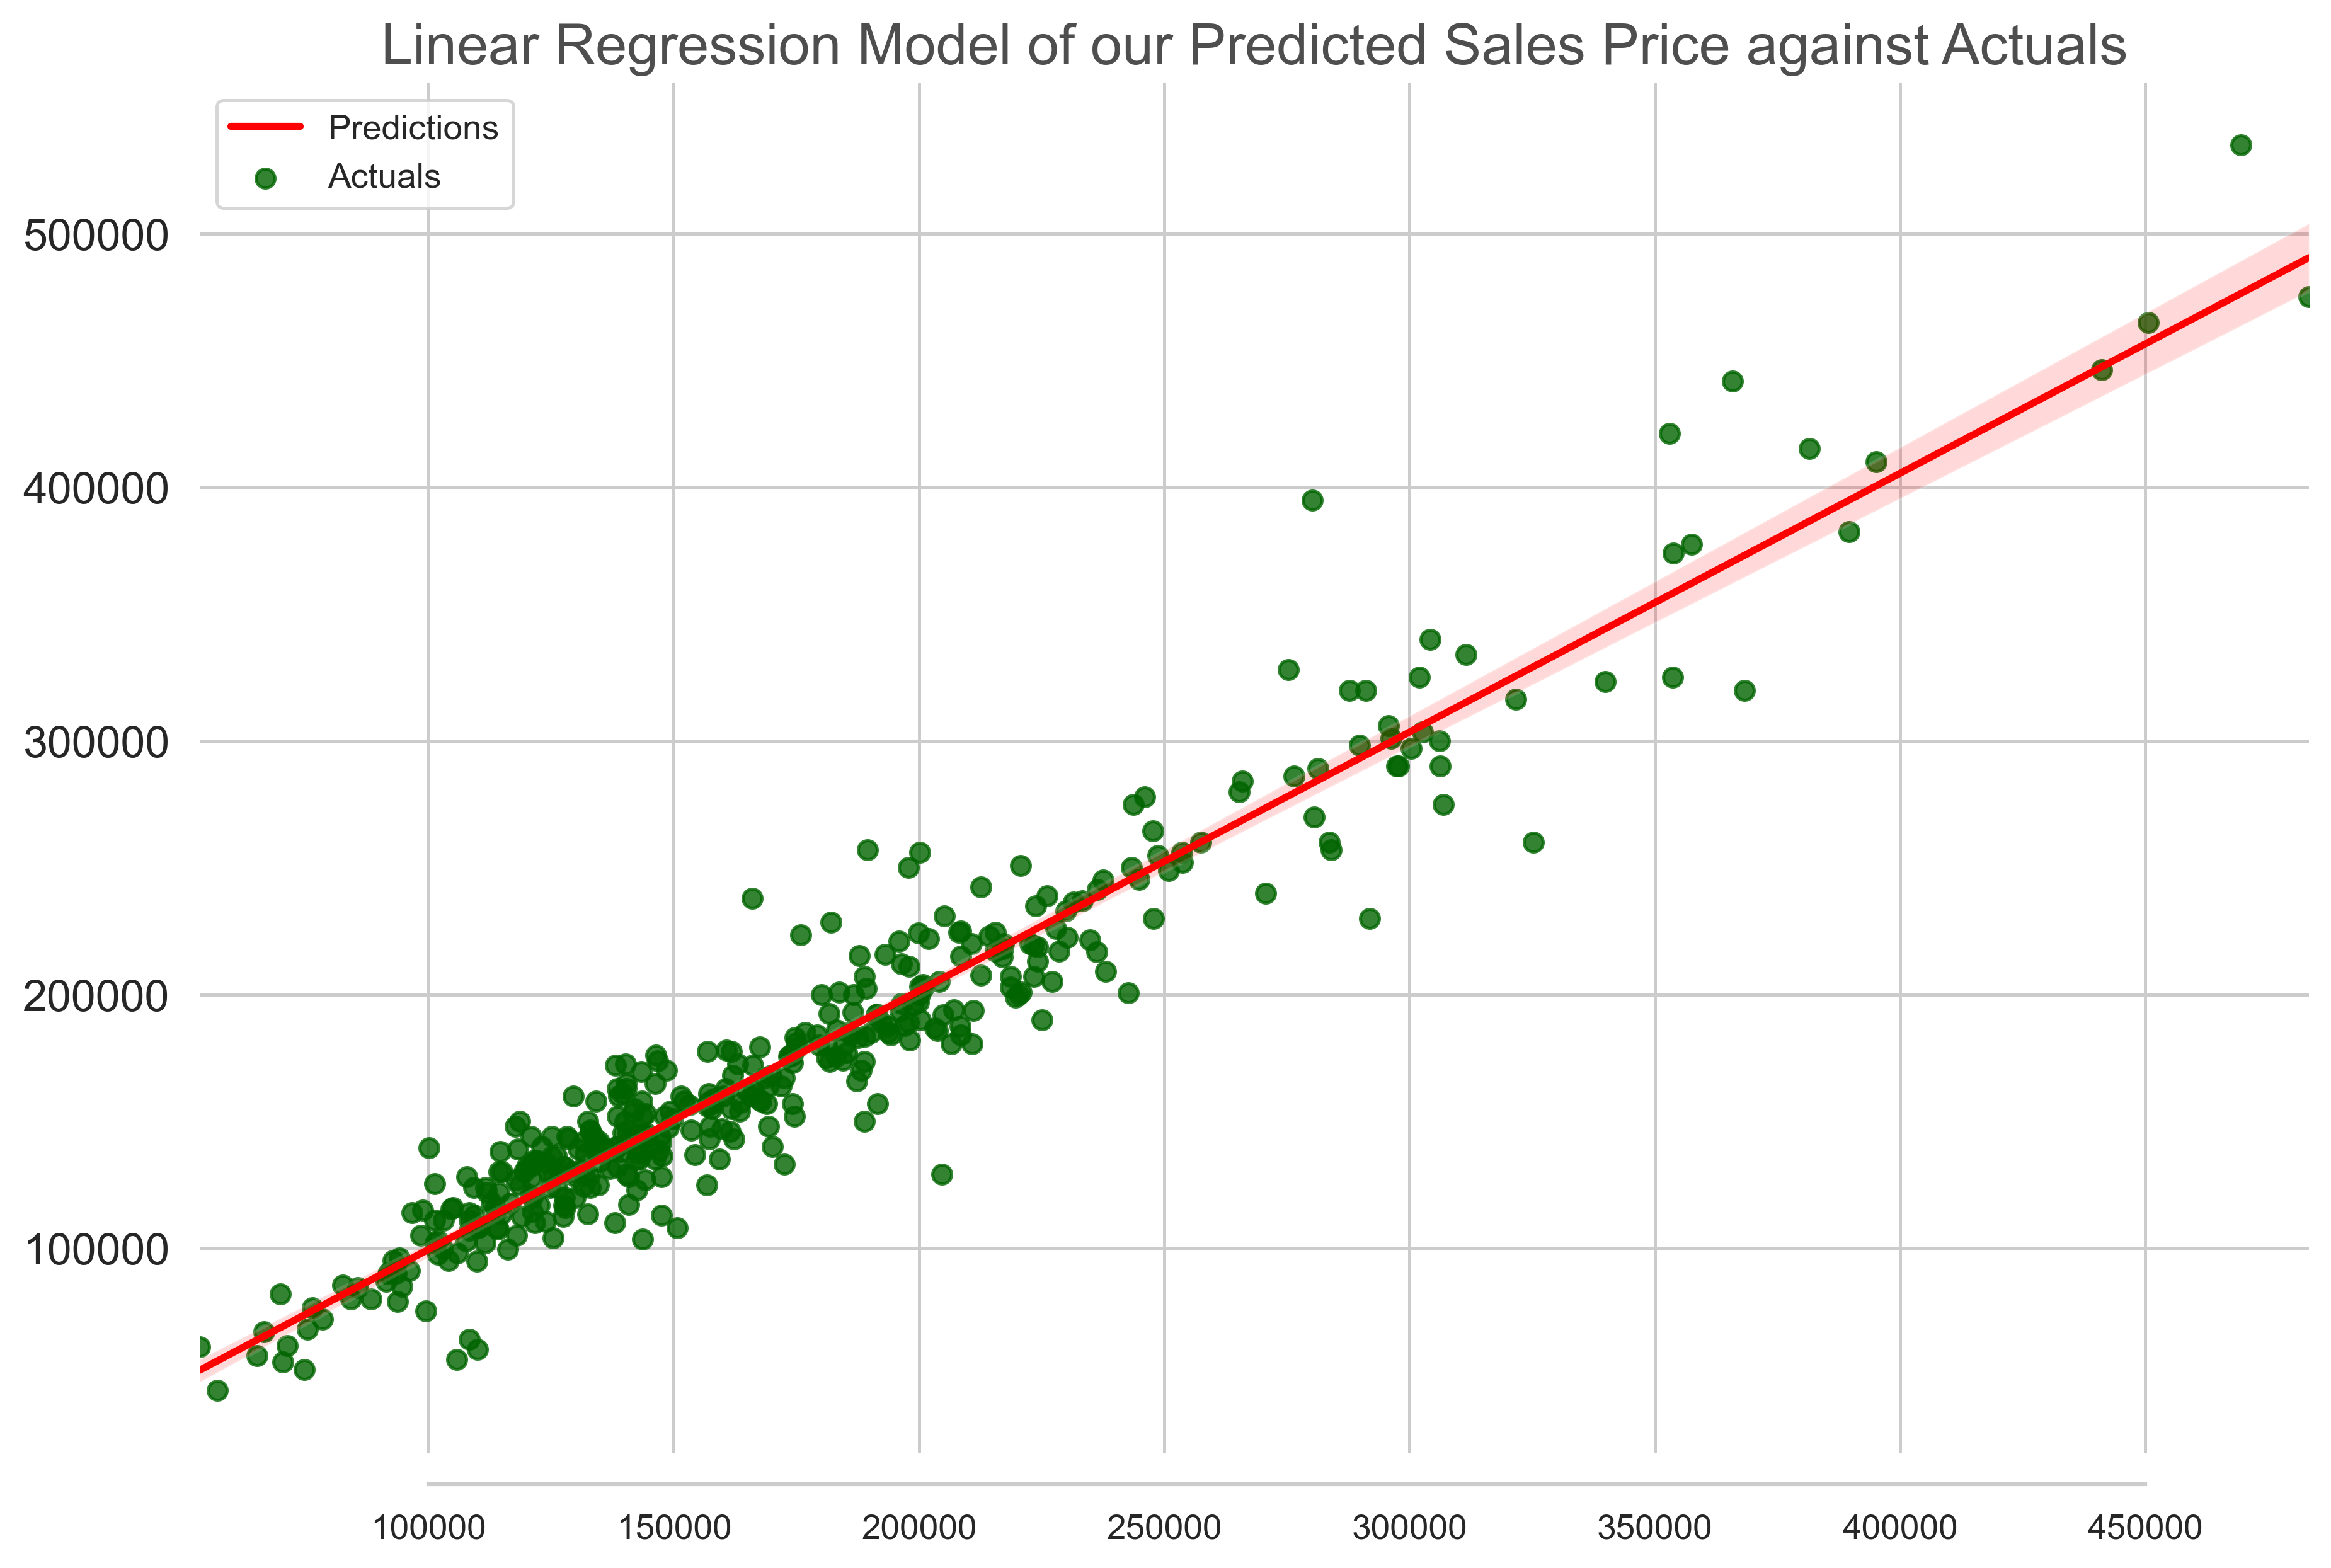

In [512]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
label = ['Predictions', 'Actuals']
sns.regplot(x = np.exp(lr.predict(X_test)), y = np.exp(y_test), color = 'darkgreen', line_kws={'color': 'red'}, label = label)
plt.legend(label)
plt.ylabel('')
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Linear Regression Model of our Predicted Sales Price against Actuals', size = 18, color = '#4f4e4e')
sns.despine(left=True,trim=True, offset = 10)

plt.savefig('./Predictions graph.png', transparent = True, dpi = 500);


In [499]:
print(np.exp(lr.predict(X_train)))
print(lr.predict(X_train))

[144685.17645192 189965.71902468 173517.69905124 ... 141355.88258712
 122597.47319986 206535.61942115]
[11.88231546 12.15459891 12.06403488 ... 11.85903598 11.71666169
 12.23822817]


In [71]:
print(np.exp(y.mean()))
print(y.mean())

166827.46844652182
12.024715434284678


In [72]:
metrics.mean_squared_error(np.exp(y_train), [np.exp(y_train.mean())] * len(y_train), squared = False)

81241.01317162355

In [73]:
np.exp(lr.predict(X_train))

array([144685.17645192, 189965.71902468, 173517.69905124, ...,
       141355.88258712, 122597.47319986, 206535.61942115])

In [74]:
y_test.head()

120     11.589887
1385    11.356272
1643    11.026792
1416    11.982617
1166    12.321631
Name: SalePrice, dtype: float64

----
# Feature Engineering

----

In [513]:
x_vars = ames_clean._get_numeric_data().columns.drop(['BsmtFin Type 1', 'Land Slope', 'Utilities', 'Half Bath', 'Garage Finish',
 'has_garage', 'has_pool', 'has_fireplace', 'has_open_porch',
 'bsmt_bath', 'bathrooms', 'SalePrice'])

X = ames_clean[x_vars]

y = np.log(ames_clean['SalePrice'])

In [514]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

In [516]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [86]:
np.linspace(0.01, 100, 50)

array([1.00000000e-02, 2.05061224e+00, 4.09122449e+00, 6.13183673e+00,
       8.17244898e+00, 1.02130612e+01, 1.22536735e+01, 1.42942857e+01,
       1.63348980e+01, 1.83755102e+01, 2.04161224e+01, 2.24567347e+01,
       2.44973469e+01, 2.65379592e+01, 2.85785714e+01, 3.06191837e+01,
       3.26597959e+01, 3.47004082e+01, 3.67410204e+01, 3.87816327e+01,
       4.08222449e+01, 4.28628571e+01, 4.49034694e+01, 4.69440816e+01,
       4.89846939e+01, 5.10253061e+01, 5.30659184e+01, 5.51065306e+01,
       5.71471429e+01, 5.91877551e+01, 6.12283673e+01, 6.32689796e+01,
       6.53095918e+01, 6.73502041e+01, 6.93908163e+01, 7.14314286e+01,
       7.34720408e+01, 7.55126531e+01, 7.75532653e+01, 7.95938776e+01,
       8.16344898e+01, 8.36751020e+01, 8.57157143e+01, 8.77563265e+01,
       8.97969388e+01, 9.18375510e+01, 9.38781633e+01, 9.59187755e+01,
       9.79593878e+01, 1.00000000e+02])

In [518]:
ls = LassoCV(alphas = np.linspace(0.01, 100, 50) )
ls.fit(Z_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 2.05061224e+00, 4.09122449e+00, 6.13183673e+00,
       8.17244898e+00, 1.02130612e+01, 1.22536735e+01, 1.42942857e+01,
       1.63348980e+01, 1.83755102e+01, 2.04161224e+01, 2.24567347e+01,
       2.44973469e+01, 2.65379592e+01, 2.85785714e+01, 3.06191837e+01,
       3.26597959e+01, 3.47004082e+01, 3.67410204e+01, 3.87816327e+01,
       4.08222449e+01, 4.28628571e+0...
       4.89846939e+01, 5.10253061e+01, 5.30659184e+01, 5.51065306e+01,
       5.71471429e+01, 5.91877551e+01, 6.12283673e+01, 6.32689796e+01,
       6.53095918e+01, 6.73502041e+01, 6.93908163e+01, 7.14314286e+01,
       7.34720408e+01, 7.55126531e+01, 7.75532653e+01, 7.95938776e+01,
       8.16344898e+01, 8.36751020e+01, 8.57157143e+01, 8.77563265e+01,
       8.97969388e+01, 9.18375510e+01, 9.38781633e+01, 9.59187755e+01,
       9.79593878e+01, 1.00000000e+02]))

In [519]:
print(ls.score(Z_train, y_train))
print(ls.score(Z_test, y_test))

0.9080183246548617
0.9105807500080355


In [92]:
poly.get_feature_names(X.columns)

['1',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'has_bsmt',
 'MS SubClass^2',
 'MS SubClass Lot Frontage',
 'MS SubClass Lot Area',
 'MS SubClass Lot Shape',
 'MS SubClass Overall Qual',
 'MS SubClass Overall Cond',
 'MS SubClass Year Built',
 'MS SubClass Year Remod/Add',
 'MS SubClass Mas Vnr Area',
 'MS SubClass Exter Qual',
 'MS SubClass Bsmt Qual',
 'MS SubClass Bsmt 

In [94]:
coef_df = pd.DataFrame({
    'column' : poly.get_feature_names(X.columns),
    'coef' : ls.coef_
})

In [95]:
coef_df[coef_df['coef'] != 0]

,column,coef
43,MS SubClass^2,-0.004275
46,MS SubClass Lot Shape,-0.002113
79,MS SubClass Screen Porch,0.001215
113,Lot Frontage Garage Yr Blt,0.017842
134,Lot Area Bsmt Qual,0.014257
140,Lot Area Heating QC,0.009531
188,Lot Shape Kitchen AbvGr,-0.010439
207,Overall Qual Year Built,0.112237
222,Overall Qual Bsmt Full Bath,0.003727
230,Overall Qual Garage Yr Blt,0.000856


In [520]:
metrics.mean_squared_error(np.exp(y_test), np.exp(ls.predict(Z_test)), squared = False)

23246.005216076424

----

In [521]:
final_test = pd.read_csv('./datasets/test_ames_clean.csv')

In [76]:
np.exp(lr.predict(final_test[X.columns]))

NameError: name 'final_test' is not defined

In [ ]:
final_test.head()

In [1]:
# final_test['SalePrice'] = np.exp(ls.predict(final_test[X.columns]))

In [ ]:
# final_test[['Id', 'SalePrice']].to_csv('./datasets/kaggle_sub_v4.csv', index = False)

In [ ]:
X = sm.add_constant(X)
y = ames_clean['SalePrice']
ols = sm.OLS(y,X).fit()

In [ ]:
ols.summary()

In [ ]:
['BsmtFin Type 1', 'Land Slope', 'Utilities', 'Half Bath', 'Garage Finish',
 'has_garage', 'has_pool', 'has_fireplace', 'has_open_porch',
 'bsmt_bath', 'bathrooms', 'SalePrice', 'Lot Shape', 'Bsmt Full Bath', 'Yr Sold']

In [ ]:
ames_clean['Utilities'].value_counts()

In [ ]:
for col in ames_clean._get_numeric_data().columns:
    if len(ames_clean[col].unique()) <= 5:
        print(col)
        print(ames_clean[col].value_counts())
        print()

In [366]:
int_rate = pd.read_stata('./datasets/rates.dta')
house_data = pd.read_csv('./datasets/us_house_data.csv')
# hd_t = house_data.transpose(copy = True)
# hd_us.drop(index = [0,1,2,3,4 ], inplace = True)
# hd_us = hd_t['0']



In [253]:
hd_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 5 to 305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    301 non-null    datetime64[ns]
 1   US      301 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.2 KB


In [2]:
hd_us.head()

NameError: name 'hd_us' is not defined

In [231]:
hd_us.rename(columns ={'index': 'date'}, inplace = True)

In [367]:
# plt.figure(figsize=(12,12))
# plt.rcParams['figure.dpi'] = 360
# sns.set(style="whitegrid")
# sns.lineplot(y = hd_us['US'], x = hd_us['date'][286:300], color = '#eb3434')
# plt.xlabel('Month Over Month Year 2020', size = 18, color = '#4f4e4e')
# plt.ylabel('Median Single Family Home Price', size = 18, color = '#4f4e4e')
# plt.xticks(size=14)
# plt.yticks(size=14)
# plt.title('Increase in Home Prices During Covid-19 Pandemic', size = 18, color = '#4f4e4e')
# sns.despine(left=True);

# plt.savefig('./covid house price chart.png', transparent = True);

In [368]:
# plt.figure(figsize=(12,12))
# plt.rcParams['figure.dpi'] = 360
# sns.set(style="whitegrid")
# sns.pointplot(y = int_rate['frm30y'][166:222], x = int_rate['year'][166:222], color = '#eb3434')
# plt.xlabel('Year', size = 18, color = '#4f4e4e')
# plt.ylabel('Interest Rate', size = 18, color = '#4f4e4e')
# plt.xticks(size=14)
# plt.yticks(size=14)
# plt.title('Year over Year Interest Rate on 30 yr Fixed Rate Mortgage', size = 18, color = '#4f4e4e')
# sns.despine(left=True);

# plt.savefig('./interest rate chart.png', transparent = True);

In [382]:
unem_rate = pd.read_excel('./datasets/unemployment_2020.xlsx')

/Users/yungpastorphillipswift/ana3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [372]:
unem_rate.head(90)

,Labor Force Statistics from the Current Population Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,LNS14000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series title:,(Seas) Unemployment Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Labor force status:,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Type of data:,Percent or rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Age:,16 years and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Years:,2020 to 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
unem_rate.drop(index = 'Year', inplace = True)

In [384]:
unem_rate

,Labor Force Statistics from the Current Population Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,2020,3.5,3.5,4.4,14.8,13.3,11.1,10.2,8.4,7.8,6.9,6.7,6.7


In [385]:
#Found this solution here: https://www.codegrepper.com/code-examples/python/make+first+row+column+names+in+pandas

new_header = unem_rate.iloc[0] #grab the first row for the header
unem_rate = unem_rate[1:] #take the data less the header row
unem_rate.columns = new_header #set the header row as the df header

In [429]:
unem_rate.drop(columns = 'month', inplace = True)

In [444]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

In [446]:
unem_rate.head()

,unemployment_rate,month
0,3.5,Jan
1,3.5,Feb
2,4.4,Mar
3,14.8,Apr
4,13.3,May


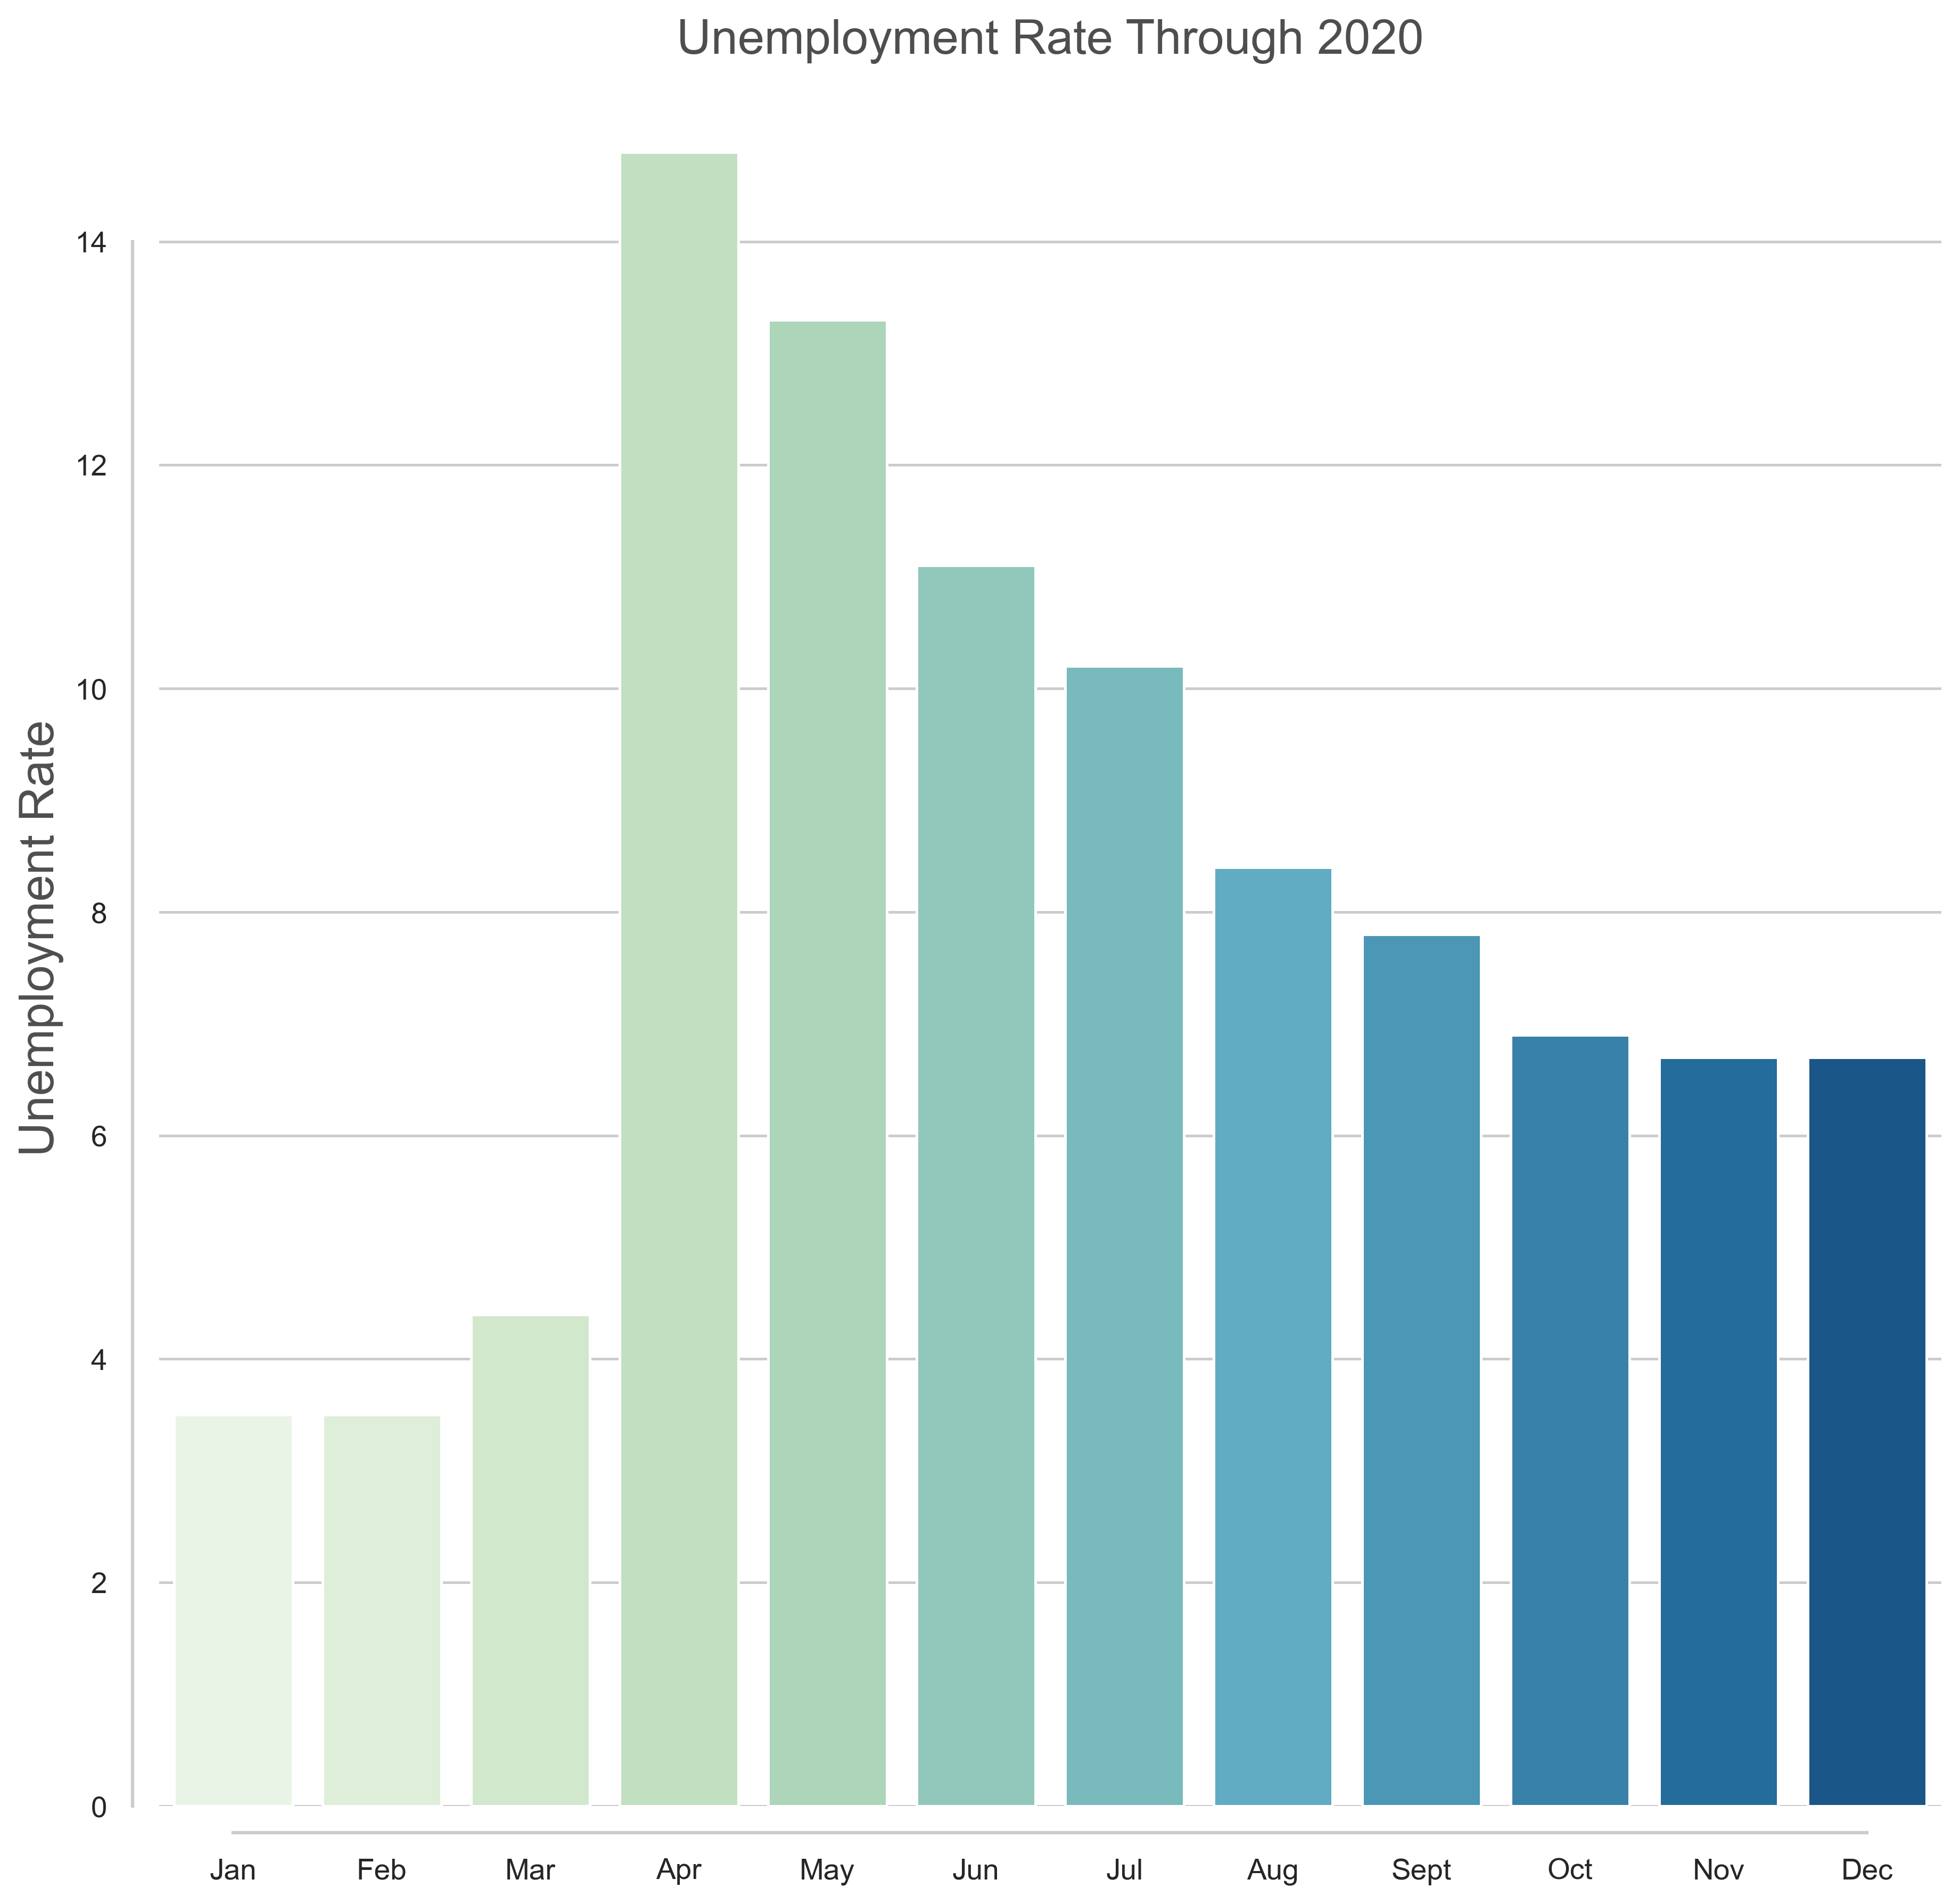

In [464]:
# plt.figure(figsize=(12,12))
# plt.rcParams['figure.dpi'] = 360
# sns.set(style="whitegrid")
# sns.barplot(y = unem_rate['unemployment_rate'], x = unem_rate['month'], palette = 'GnBu')
# plt.xlabel('')
# plt.ylabel('Unemployment Rate', size = 18, color = '#4f4e4e')
# plt.xticks(size=14)
# plt.yticks(size=14)
# plt.title('Unemployment Rate Through 2020', size = 18, color = '#4f4e4e')
# sns.despine(offset = 10, trim = True);

# plt.savefig('./unemployment rate chart.png', transparent = True);